# Claster pada data iris menggunakan k means dengan claster 2,3,4 dan hitung inertia dan silhouette

In [ ]:
%pip install pymysql
%pip install psycopg2

Bagian ini digunakan untuk menginstal dua library penting, yaitu pymysql dan psycopg2. Fungsinya adalah untuk menghubungkan Python dengan dua jenis database berbeda: MySQL dan PostgreSQL. Kalau kita ingin ambil data langsung dari database, maka dua library ini wajib dipasang dulu.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import psycopg2
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Di sini kita menyiapkan semua alat yang akan dipakai. Library seperti pandas, numpy, dan matplotlib digunakan untuk olah data dan bikin grafik. sklearn dipakai untuk proses clustering dan pengukuran performanya. Terakhir, pymysql dan psycopg2 disiapkan untuk bisa terhubung ke database.

In [ ]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-24ccfcfa-iqbal.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_7h7RaEuETy6xtaTdGPL",
        database="defaultdb",
        port=11038
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_data")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-207e66db-iqbal.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_moPYLh4RrOq11aEBY_x",
        database="iris",
        port=11038
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_dataset")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa          64.0         72.0          85.1         93.5
  2     Iris-setosa          14.0          2.0         904.9        309.1
  3     Iris-setosa          10.3         50.2         584.7        803.2
  4     Iris-setosa          31.5          4.2         304.6        163.1
  5     Iris-setosa          49.4          3.2         605.0        703.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.0          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.4           4.9          3.1
 11     Iris-setosa           1.5          0.3           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.3     

Kode ini bertugas mengambil data dari dua sumber database berbeda: PostgreSQL dan MySQL. Masing-masing database punya tabel iris yang isinya data bunga iris (mirip dataset iris yang terkenal di machine learning). Setelah datanya diambil, keduanya digabung berdasarkan kolom id dan class supaya sinkron, lalu ditampilkan hasil gabungannya secara lengkap.

In [ ]:
# 1. Siapkan fitur (X) dan label (y)
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_cols].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi clustering
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_
    accuracy = adjusted_rand_score(y, labels)

    print(f"\nHasil K-Means dengan {k} Klaster:")
    print(f"Centroids:\n{centroids}")
    print(f"Akurasi (Adjusted Rand Score): {accuracy:.3f}")

    return labels, centroids, accuracy

# 4. Jalankan clustering
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)


Hasil K-Means dengan 2 Klaster:
Centroids:
[[-0.1541248  -0.15135516 -0.00775946 -0.00611325]
 [ 5.62555506  5.5244634   0.2832204   0.22313371]]
Akurasi (Adjusted Rand Score): 0.001

Hasil K-Means dengan 3 Klaster:
Centroids:
[[-0.17091127 -0.17532476 -0.12920757 -0.1420304 ]
 [ 5.62555506  5.5244634   0.2832204   0.22313371]
 [ 0.44179514  0.69956555  4.3036484   4.81894546]]
Akurasi (Adjusted Rand Score): 0.001

Hasil K-Means dengan 4 Klaster:
Centroids:
[[-0.17091127 -0.17532476 -0.12920757 -0.1420304 ]
 [ 5.62555506  5.5244634   0.2832204   0.22313371]
 [ 0.50568831  0.67603801  7.71046672  1.35456507]
 [ 0.37790196  0.72309309  0.89683008  8.28332586]]
Akurasi (Adjusted Rand Score): 0.001


Bagian ini mulai masuk ke tahap analisis. Pertama, kita ambil fitur utama dari data bunga iris (panjang dan lebar kelopak dan sepal). Lalu, data diubah skalanya supaya lebih rapi dan adil untuk semua fitur. Setelah itu, kita jalankan K-Means clustering untuk 3 variasi jumlah klaster: 2, 3, dan 4. Hasilnya kita cek akurasinya menggunakan metrik bernama Adjusted Rand Score, yang cocok dipakai kalau kita punya label asli.

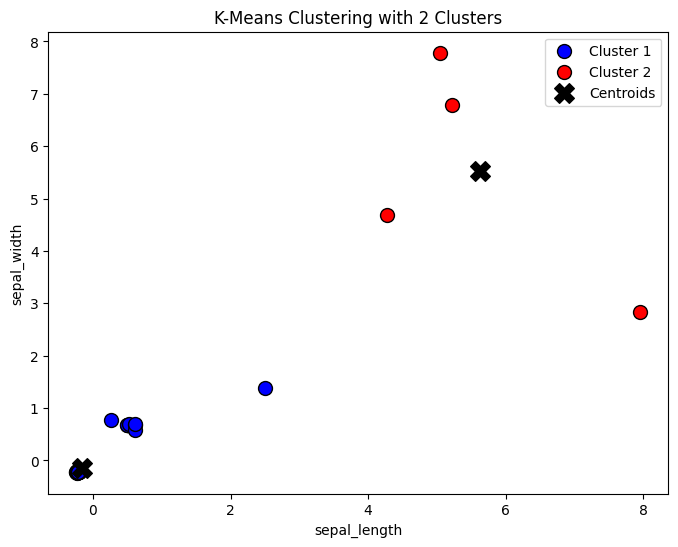

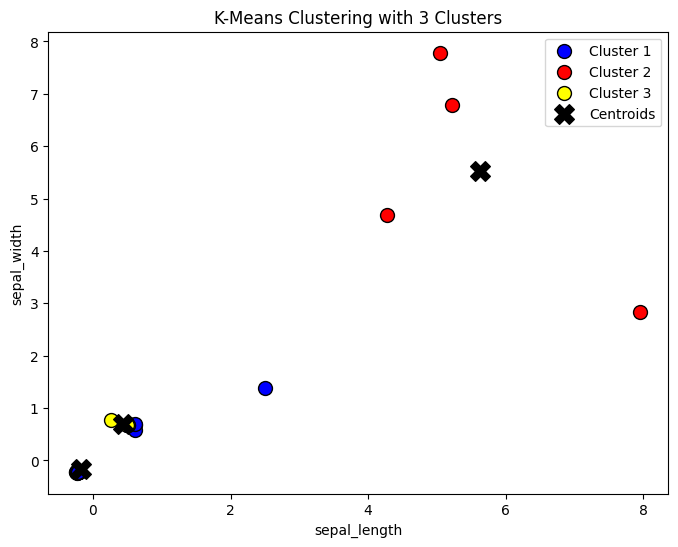

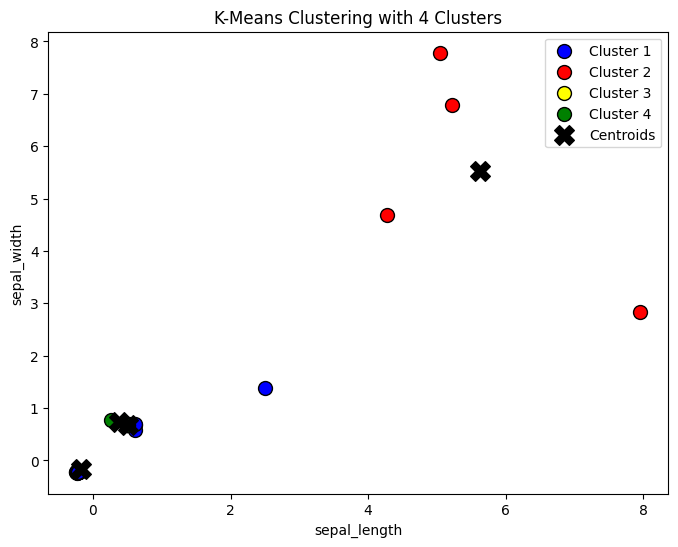

In [ ]:
# baruuuuu
# 1. Siapkan fitur (X) dan label (y)
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_cols].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means, plotting dan menampilkan centroid
def perform_kmeans_plot(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'yellow', 'green']

    for cluster in range(k):
        cluster_points = X_scaled[labels == cluster]
        plt.scatter(
            cluster_points[:, 0], cluster_points[:, 1],
            color=colors[cluster % len(colors)],
            label=f'Cluster {cluster + 1}',
            edgecolors='k', s=100
        )

    # Plot centroid (X hitam)
    plt.scatter(
        centroids[:, 0], centroids[:, 1],
        c='black', marker='X', s=200, label='Centroids'
    )

    plt.title(f"K-Means Clustering with {k} Clusters")
    plt.xlabel(feature_cols[0])
    plt.ylabel(feature_cols[1])
    plt.legend()
    plt.show()


# 4. Melakukan clustering dengan K=2, K=3, dan K=4 dan plot hasilnya
for k in [2, 3, 4]:
    perform_kmeans_plot(X_scaled, k)


Nah, di sini kita bukan hanya menghitung hasil clustering, tapi juga menggambarkannya. Kita plot hasil K-Means untuk 2, 3, dan 4 klaster. Setiap klaster dikasih warna berbeda, dan pusat klasternya ditandai dengan ‘X’ warna hitam. Visualisasi ini penting supaya kita bisa "melihat" bagaimana data dibagi ke dalam kelompok.

In [ ]:
# 1. Siapkan fitur (X) dan label (y)
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_cols].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk menghitung inertia secara manual
def calculate_inertia_step_by_step(X_scaled, labels, centroids):
    inertia = 0
    print("Langkah-langkah perhitungan Inertia:")

    for i in range(len(X_scaled)):
        cluster = labels[i]
        distance = np.linalg.norm(X_scaled[i] - centroids[cluster]) ** 2
        inertia += distance
        print(f"Titik data {i+1} (Fitur: {X_scaled[i]}), Klaster: {cluster}, "
              f"Centroid: {centroids[cluster]}, Jarak kuadrat: {distance:.3f}, "
              f"Inertia sementara: {inertia:.3f}")

    return inertia

# 4. Fungsi untuk menjalankan KMeans dan menghitung inertia manual
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids (fitur hasil standarisasi):\n{centroids}")

    # Hitung inertia manual
    manual_inertia = calculate_inertia_step_by_step(X_scaled, labels, centroids)
    print(f"\nTotal Inertia Manual: {manual_inertia:.3f}")

    # Bandingkan dengan inertia dari sklearn
    sklearn_inertia = kmeans.inertia_
    print(f"Inertia dari sklearn: {sklearn_inertia:.3f}")
    print("="*50)

    return labels, centroids, manual_inertia

# 5. Jalankan untuk k=2, 3, dan 4
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)



=== Hasil K-Means dengan 2 Klaster ===
Centroids (fitur hasil standarisasi):
[[-0.1541248  -0.15135516 -0.00775946 -0.00611325]
 [ 5.62555506  5.5244634   0.2832204   0.22313371]]
Langkah-langkah perhitungan Inertia:
Titik data 1 (Fitur: [0.49795746 0.68154446 0.54372071 0.56906924]), Klaster: 0, Centroid: [-0.1541248  -0.15135516 -0.00775946 -0.00611325], Jarak kuadrat: 1.754, Inertia sementara: 1.754
Titik data 2 (Fitur: [ 7.95413149  2.84007115 -0.05375707 -0.17146554]), Klaster: 1, Centroid: [5.62555506 5.5244634  0.2832204  0.22313371], Jarak kuadrat: 12.897, Inertia sementara: 14.651
Titik data 3 (Fitur: [ 5.04187615  7.78686169 -0.09797042  0.33844555]), Klaster: 1, Centroid: [5.62555506 5.5244634  0.2832204  0.22313371], Jarak kuadrat: 5.618, Inertia sementara: 20.269
Titik data 4 (Fitur: [ 2.49433487  1.37836013  0.15536016 -0.14819159]), Klaster: 0, Centroid: [-0.1541248  -0.15135516 -0.00775946 -0.00611325], Jarak kuadrat: 9.401, Inertia sementara: 29.670
Titik data 5 (Fitu

Kalau di bagian ini, kita belajar tentang konsep inertia, yaitu seberapa dekat titik-titik data ke pusat klasternya. Semakin kecil inertia, berarti klasternya makin rapat dan bagus. Yang menarik, kita hitung inertia-nya secara manual—titik demi titik—buat memastikan hasilnya sama dengan perhitungan otomatis dari sklearn. Jadi bisa sekalian belajar logika di balik layar algoritma K-Means.

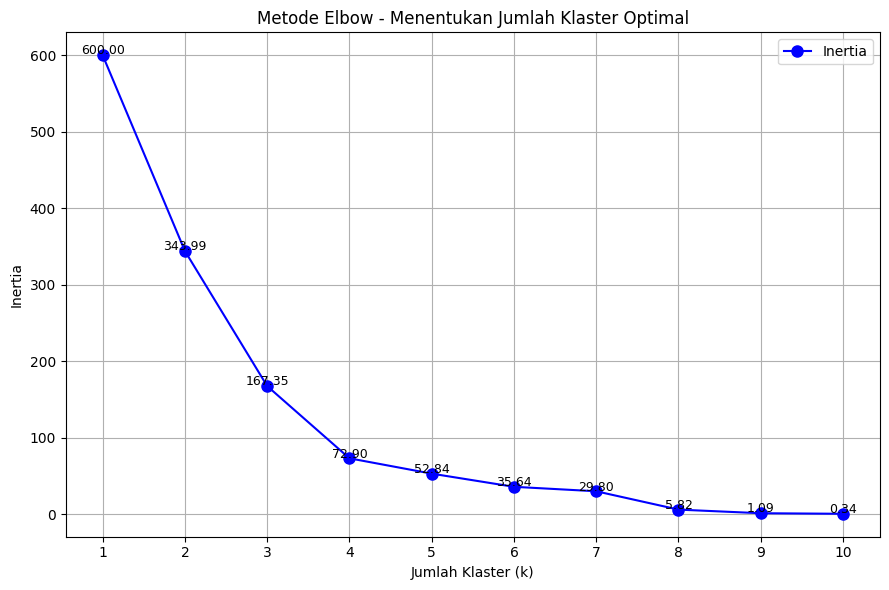

In [ ]:
# 1. Siapkan fitur (X) dan label (y)
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_cols].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Hitung inertia untuk berbagai nilai k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 4. Plot Elbow Diagram
plt.figure(figsize=(9, 6))
plt.plot(K_range, inertias, 'bo-', markersize=8, label='Inertia')
plt.title("Metode Elbow - Menentukan Jumlah Klaster Optimal")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.grid(True)

# Tambahkan label inertia di tiap titik
for i, inertia in enumerate(inertias):
    plt.text(K_range[i], inertias[i] + 1, f"{inertia:.2f}", ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()

Ini adalah metode Elbow yang terkenal untuk menentukan berapa jumlah klaster yang ideal. Kita hitung inertia untuk k = 1 sampai 10, lalu plot hasilnya. Grafik ini akan menunjukkan di titik mana terjadi "tekukan" atau elbow, yang biasanya jadi tanda jumlah klaster optimal. Angka inertia juga ditampilkan di grafik supaya kita bisa bandingkan secara jelas.


=== Hasil K-Means dengan 2 Klaster ===
Centroids:
[[-0.1541248  -0.15135516 -0.00775946 -0.00611325]
 [ 5.62555506  5.5244634   0.2832204   0.22313371]]
Silhouette Score untuk 2 klaster: 0.916

=== Hasil K-Means dengan 3 Klaster ===
Centroids:
[[-0.17091127 -0.17532476 -0.12920757 -0.1420304 ]
 [ 5.62555506  5.5244634   0.2832204   0.22313371]
 [ 0.44179514  0.69956555  4.3036484   4.81894546]]
Silhouette Score untuk 3 klaster: 0.936

=== Hasil K-Means dengan 4 Klaster ===
Centroids:
[[-0.17091127 -0.17532476 -0.12920757 -0.1420304 ]
 [ 5.62555506  5.5244634   0.2832204   0.22313371]
 [ 0.50568831  0.67603801  7.71046672  1.35456507]
 [ 0.37790196  0.72309309  0.89683008  8.28332586]]
Silhouette Score untuk 4 klaster: 0.948

>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = 4 (dengan score = 0.948)


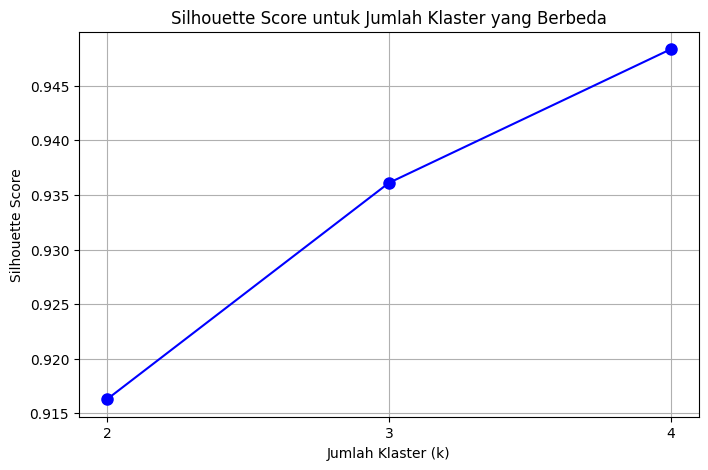

In [ ]:
# 1. Siapkan fitur (X) dan label (y)
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_cols].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means dan menghitung Silhouette Score
def perform_kmeans_with_silhouette(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, labels)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Output hasil untuk klaster k
    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids:\n{centroids}")
    print(f"Silhouette Score untuk {k} klaster: {silhouette_avg:.3f}")

    return silhouette_avg

# 4. Melakukan clustering dan menghitung Silhouette Score untuk k=2, 3, dan 4
silhouette_scores = []
k_values = [2, 3, 4]

for k in k_values:
    score = perform_kmeans_with_silhouette(X_scaled, k)
    silhouette_scores.append(score)

# 5. Menentukan k dengan Silhouette Score terbaik
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"\n>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = {best_k} (dengan score = {best_score:.3f})")

# 6. Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-', markersize=8)
plt.title("Silhouette Score untuk Jumlah Klaster yang Berbeda")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.show()

Terakhir, kita pakai metrik Silhouette Score untuk mengecek seberapa baik data terbagi dalam klaster. Skornya antara -1 sampai 1, dan makin mendekati 1 artinya klaster makin terpisah jelas. Kita coba nilai k = 2, 3, dan 4, lalu cek mana yang punya skor terbaik. Hasil akhirnya kita tampilkan dalam grafik juga untuk membantu memutuskan jumlah klaster terbaik.